In [1]:
import numpy as np
import pandas as pd
import scipy as sp

Text(0.5, 1.0, '한글 타이틀...')

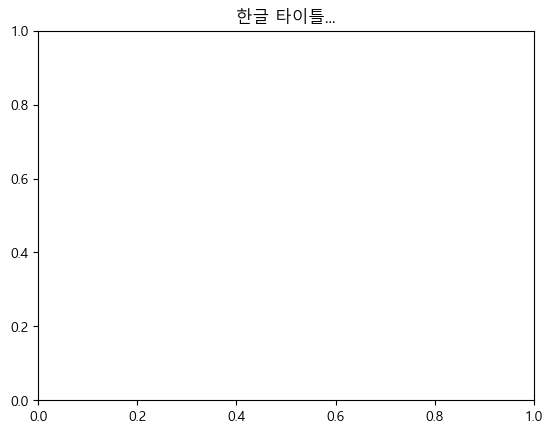

In [2]:
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
import matplotlib.font_manager as fm

plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac (AppleGothic 또는 AppleSDGothicNeo)
# plt.rcParams['font.family'] = 'NanumGothic' # Linux (NanumGothic 또는 다른 설치된 한글 폰트)

plt.rcParams['axes.unicode_minus'] = False #glypy 8722: Axes에 - 표시 안되는 것
plt.title('한글 타이틀...')

# <center>숫자 디지트 모델</center>

[sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits) 는 8x8 크기의 숫자 데이터이다.

In [3]:
# load_digits 탑재

from sklearn.datasets import load_digits
digits=load_digits()

In [7]:
# 설명

print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
# 주요 키



dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

이 데이터 세트의 키 값 이다:
- DESCR: 데이터세트 설명
- data: 1797 이미지 데이터. 64개 8x8 이미지
- target: Label
- feature_names: 각각의 특징을 묘사하는 문자열 리스트
- target: 데이터 배열에서 행은 꽃에 해당하고, 컬럼은 각 꽃이 가진 측정치이다.
- images: 8x8의 이미지

### 데이터 살펴보기

학습 데이터와 실제 이미지 데이터가 있다

In [ ]:
# 학습 데이터



(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
         15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
         12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
          0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
         10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 (1797, 64))

In [10]:
digits['data'].shape,digits['images'].shape,digits['data'][0]

((1797, 64),
 (1797, 8, 8),
 array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]))

In [ ]:
# 실 데이터



(array([[[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]]),
 (1797, 8, 8))

In [ ]:
# 데이터 라벨



(array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)), (1797,))

In [9]:
# 컬럼
digits['target_names']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
digits['target'],digits['target_names']

(array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

### 이미지 보기

학습 데이터 이미지 하나는 8x8 크기가 data 필드에 리스트 한 요소로 표현하고 있다

In [ ]:
# 학습데이터
digits['data'][0].shape

(64,)

In [ ]:
digits['images'][0].shape   #(8,8) : (행,열) -> 폭,높이

(8, 8)

In [ ]:
# 이미지의 width x height
digits['data'][0].reshape(8, 8).shape

(8, 8)

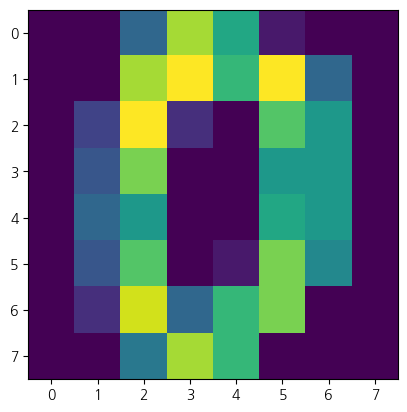

In [ ]:
# 이미지 하나 보기



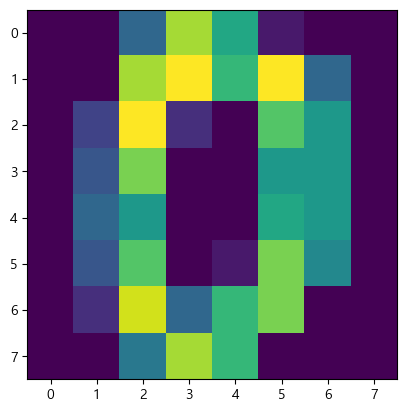

In [15]:
plt.imshow(digits['data'][0].reshape(8,8))

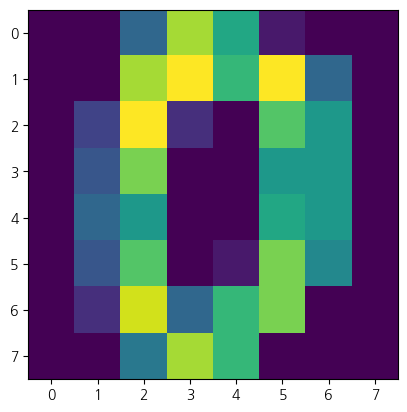

In [ ]:
# 이미지 하나 보기



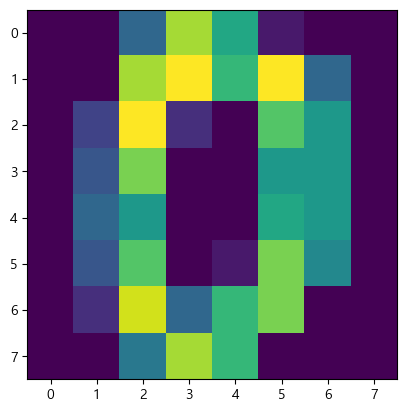

In [16]:
plt.imshow(digits['images'][0])

이미지를 보기 위해 numpy.reshape() 를 사용:

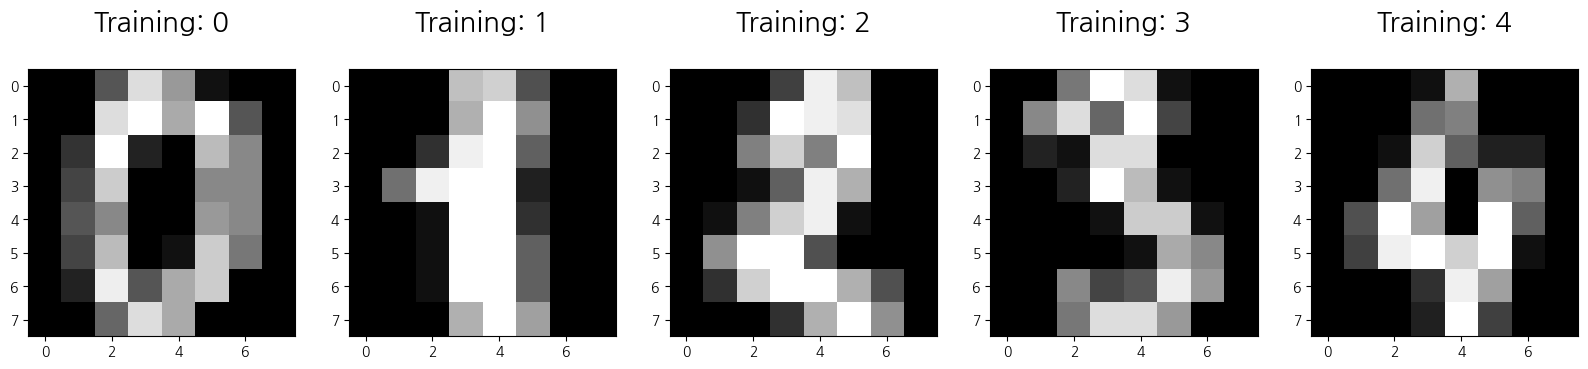

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i, (image, label) in enumerate( zip(digits['data'][0:5],digits['target'][0:5])):


    plt.title('Training: %i\n' % label, fontsize=20)

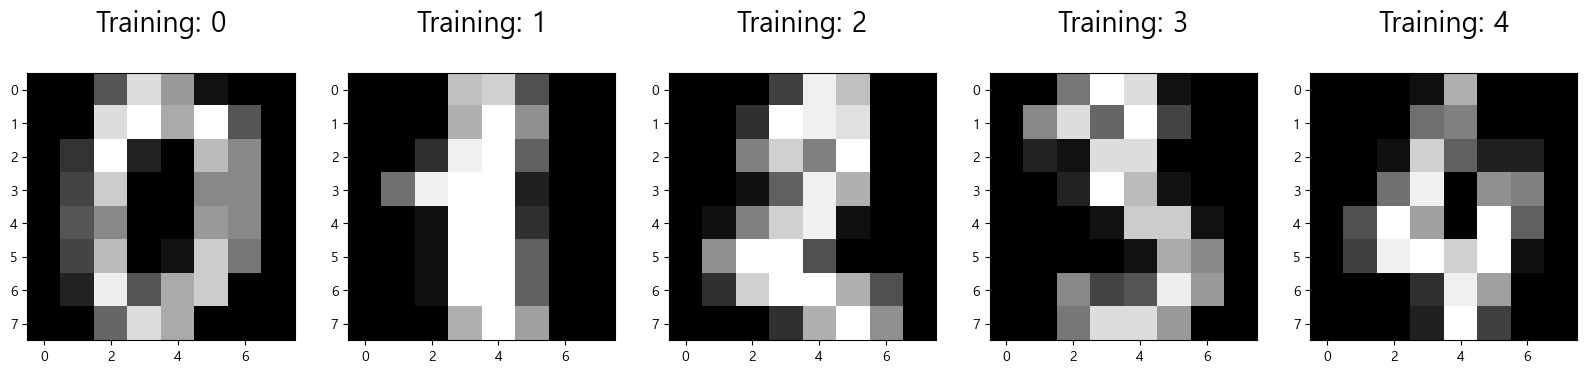

In [17]:
plt.figure(figsize=(20,4))

for i, (image, label) in enumerate( zip(digits['data'][0:5],digits['target'][0:5])):
    plt.subplot(1,5,i+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize=20)

# 1. SVM

여기서는 Support Vector Classifier (SVC)를 사용합니다.


### 1) 학습 데이터와 테스트 데이터 세트로 분리

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(digits['data'],digits['target'],test_size=.3,random_state=50)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [ ]:
# kernel='linear'는 선형 커널을 사용하도록 지정합니다. 다른 커널('rbf', 'poly' 등)도 시도해볼 수 있습니다.


# 모델 훈련
print("\n모델 훈련 중...")


print("모델 훈련 완료.")



모델 훈련 중...
모델 훈련 완료.


In [ ]:
# 5. 예측


# 6. 모델 평가


print(f"\n정확도 (Accuracy): {accuracy:.4f}")



정확도 (Accuracy): 0.9711


In [23]:
print("\n모델 훈련 중...")
model=SVC(kernel='rbf',random_state=42)
model.fit(X_train,y_train)
print("모델 훈련 완료.")

pred_test=model.predict(X_test)
accuracy=accuracy_score(y_test,pred_test)
print(f"\n정확도 (Accuracy): {accuracy:.4f}")


모델 훈련 중...
모델 훈련 완료.

정확도 (Accuracy): 0.9741


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       0.98      0.96      0.97        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      0.98      0.99        52
           7       1.00      0.98      0.99        48
           8       0.94      0.92      0.93        48
           9       0.96      0.94      0.95        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [24]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        63
           1       0.95      1.00      0.98        59
           2       0.98      1.00      0.99        55
           3       1.00      0.93      0.97        45
           4       0.98      1.00      0.99        55
           5       0.96      0.94      0.95        54
           6       0.98      1.00      0.99        53
           7       0.96      0.98      0.97        53
           8       0.98      0.94      0.96        47
           9       0.95      0.95      0.95        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### 오분류된 샘플 시각화


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False,

In [26]:
np.where(pred_test!=y_test)

(array([ 18,  87, 181, 192, 284, 336, 395, 401, 409, 427, 465, 489, 506,
        532]),)

(array([109, 118, 124, 130, 181, 196, 211, 331, 335, 378, 398, 429, 430]),)

In [27]:
digits['target'][532]

np.int64(6)

In [ ]:
# 예측이 틀린 경우만 찾기


incorrect_indices

array([109, 118, 124, 130, 181, 196, 211, 331, 335, 378, 398, 429, 430])


13개의 오분류된 샘플:


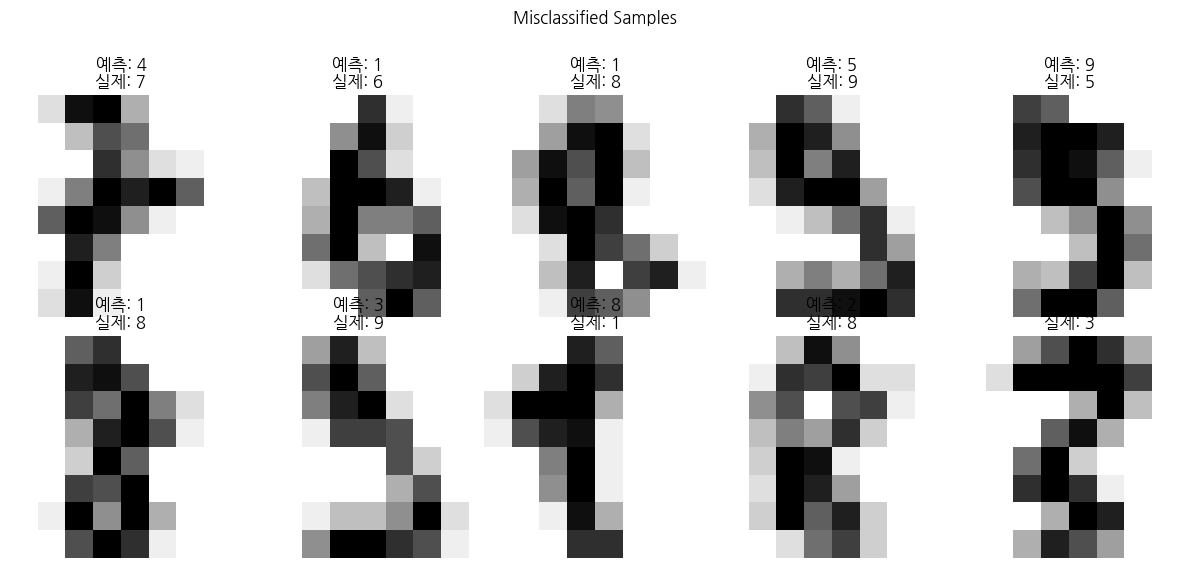

In [ ]:
if len(incorrect_indices) > 0:
    print(f"\n{len(incorrect_indices)}개의 오분류된 샘플:")
    plt.figure(figsize=(12, 6))
    for plot_index, wrong_index in enumerate(incorrect_indices[:10]): # 최대 10개만 시각화



        plt.axis('off')
    plt.suptitle('Misclassified Samples')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
    plt.show()
else:
    print("\n모든 샘플이 올바르게 분류되었습니다!")


14개의 오분류된 샘플:


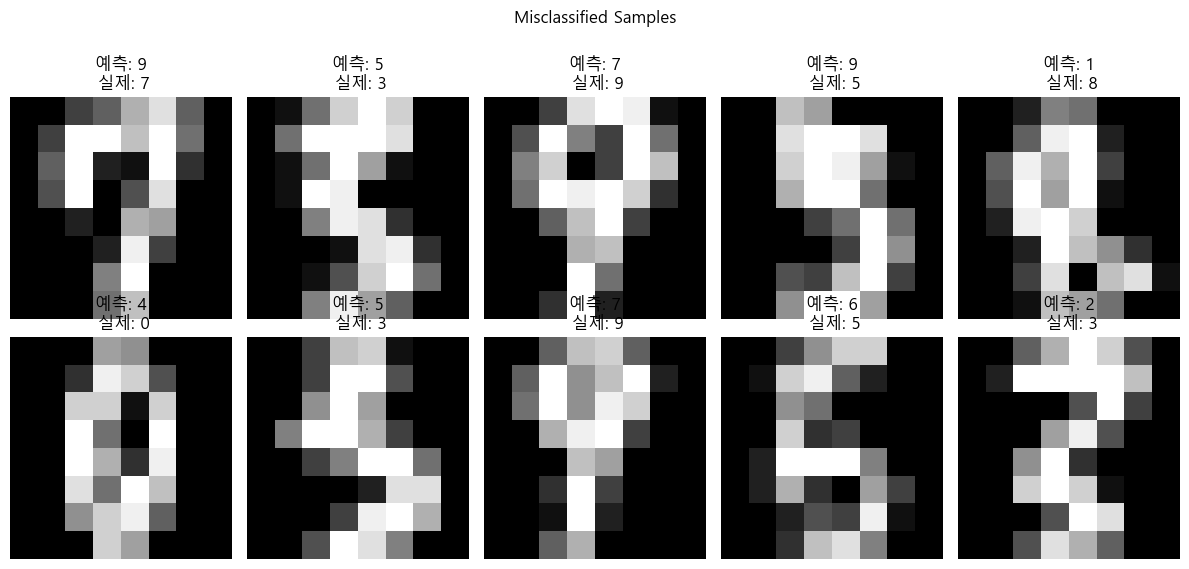

In [29]:
incorrect_indices = np.where(pred_test != y_test)[0]  # 튜플 아닌 array

if len(incorrect_indices) > 0:
    print(f"\n{len(incorrect_indices)}개의 오분류된 샘플:")
    plt.figure(figsize=(12, 6))
    for plot_index, wrong_index in enumerate(incorrect_indices[:10]):
        plt.subplot(2,5,plot_index+1)
        plt.imshow(X_test[wrong_index].reshape(8,8), cmap=plt.cm.gray)
        plt.title(f'예측: {pred_test[wrong_index]}\n 실제: {y_test[wrong_index]}')
        plt.axis('off')
    plt.suptitle('Misclassified Samples')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\n모든 샘플이 올바르게 분류되었습니다!")


GridSearchCV는 주어진 하이퍼파라미터 조합을 모두 탐색하여 교차 검증(cross-validation)을 통해 최상의 성능을 내는 조합을 찾아줍니다.

# 2. DecisionTree

이제 학습 데이터와 테스트 데이터를 준비해 의사결정트리 판단을 해보자,

### 1) 학습 데이터와 테스트 데이터 세트로 분리

In [ ]:
from sklearn.model_selection import train_test_split




### 2). 모델 학습

의사결정트리 `fit()`에 학습용 피처 데이터 속성과 결정 값 데이터 세트를 입력하면 학습을 한다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


# 학습수행




,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,11
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Tree 그리기

max_depth 로 분류되는 기준을 확인해 보자

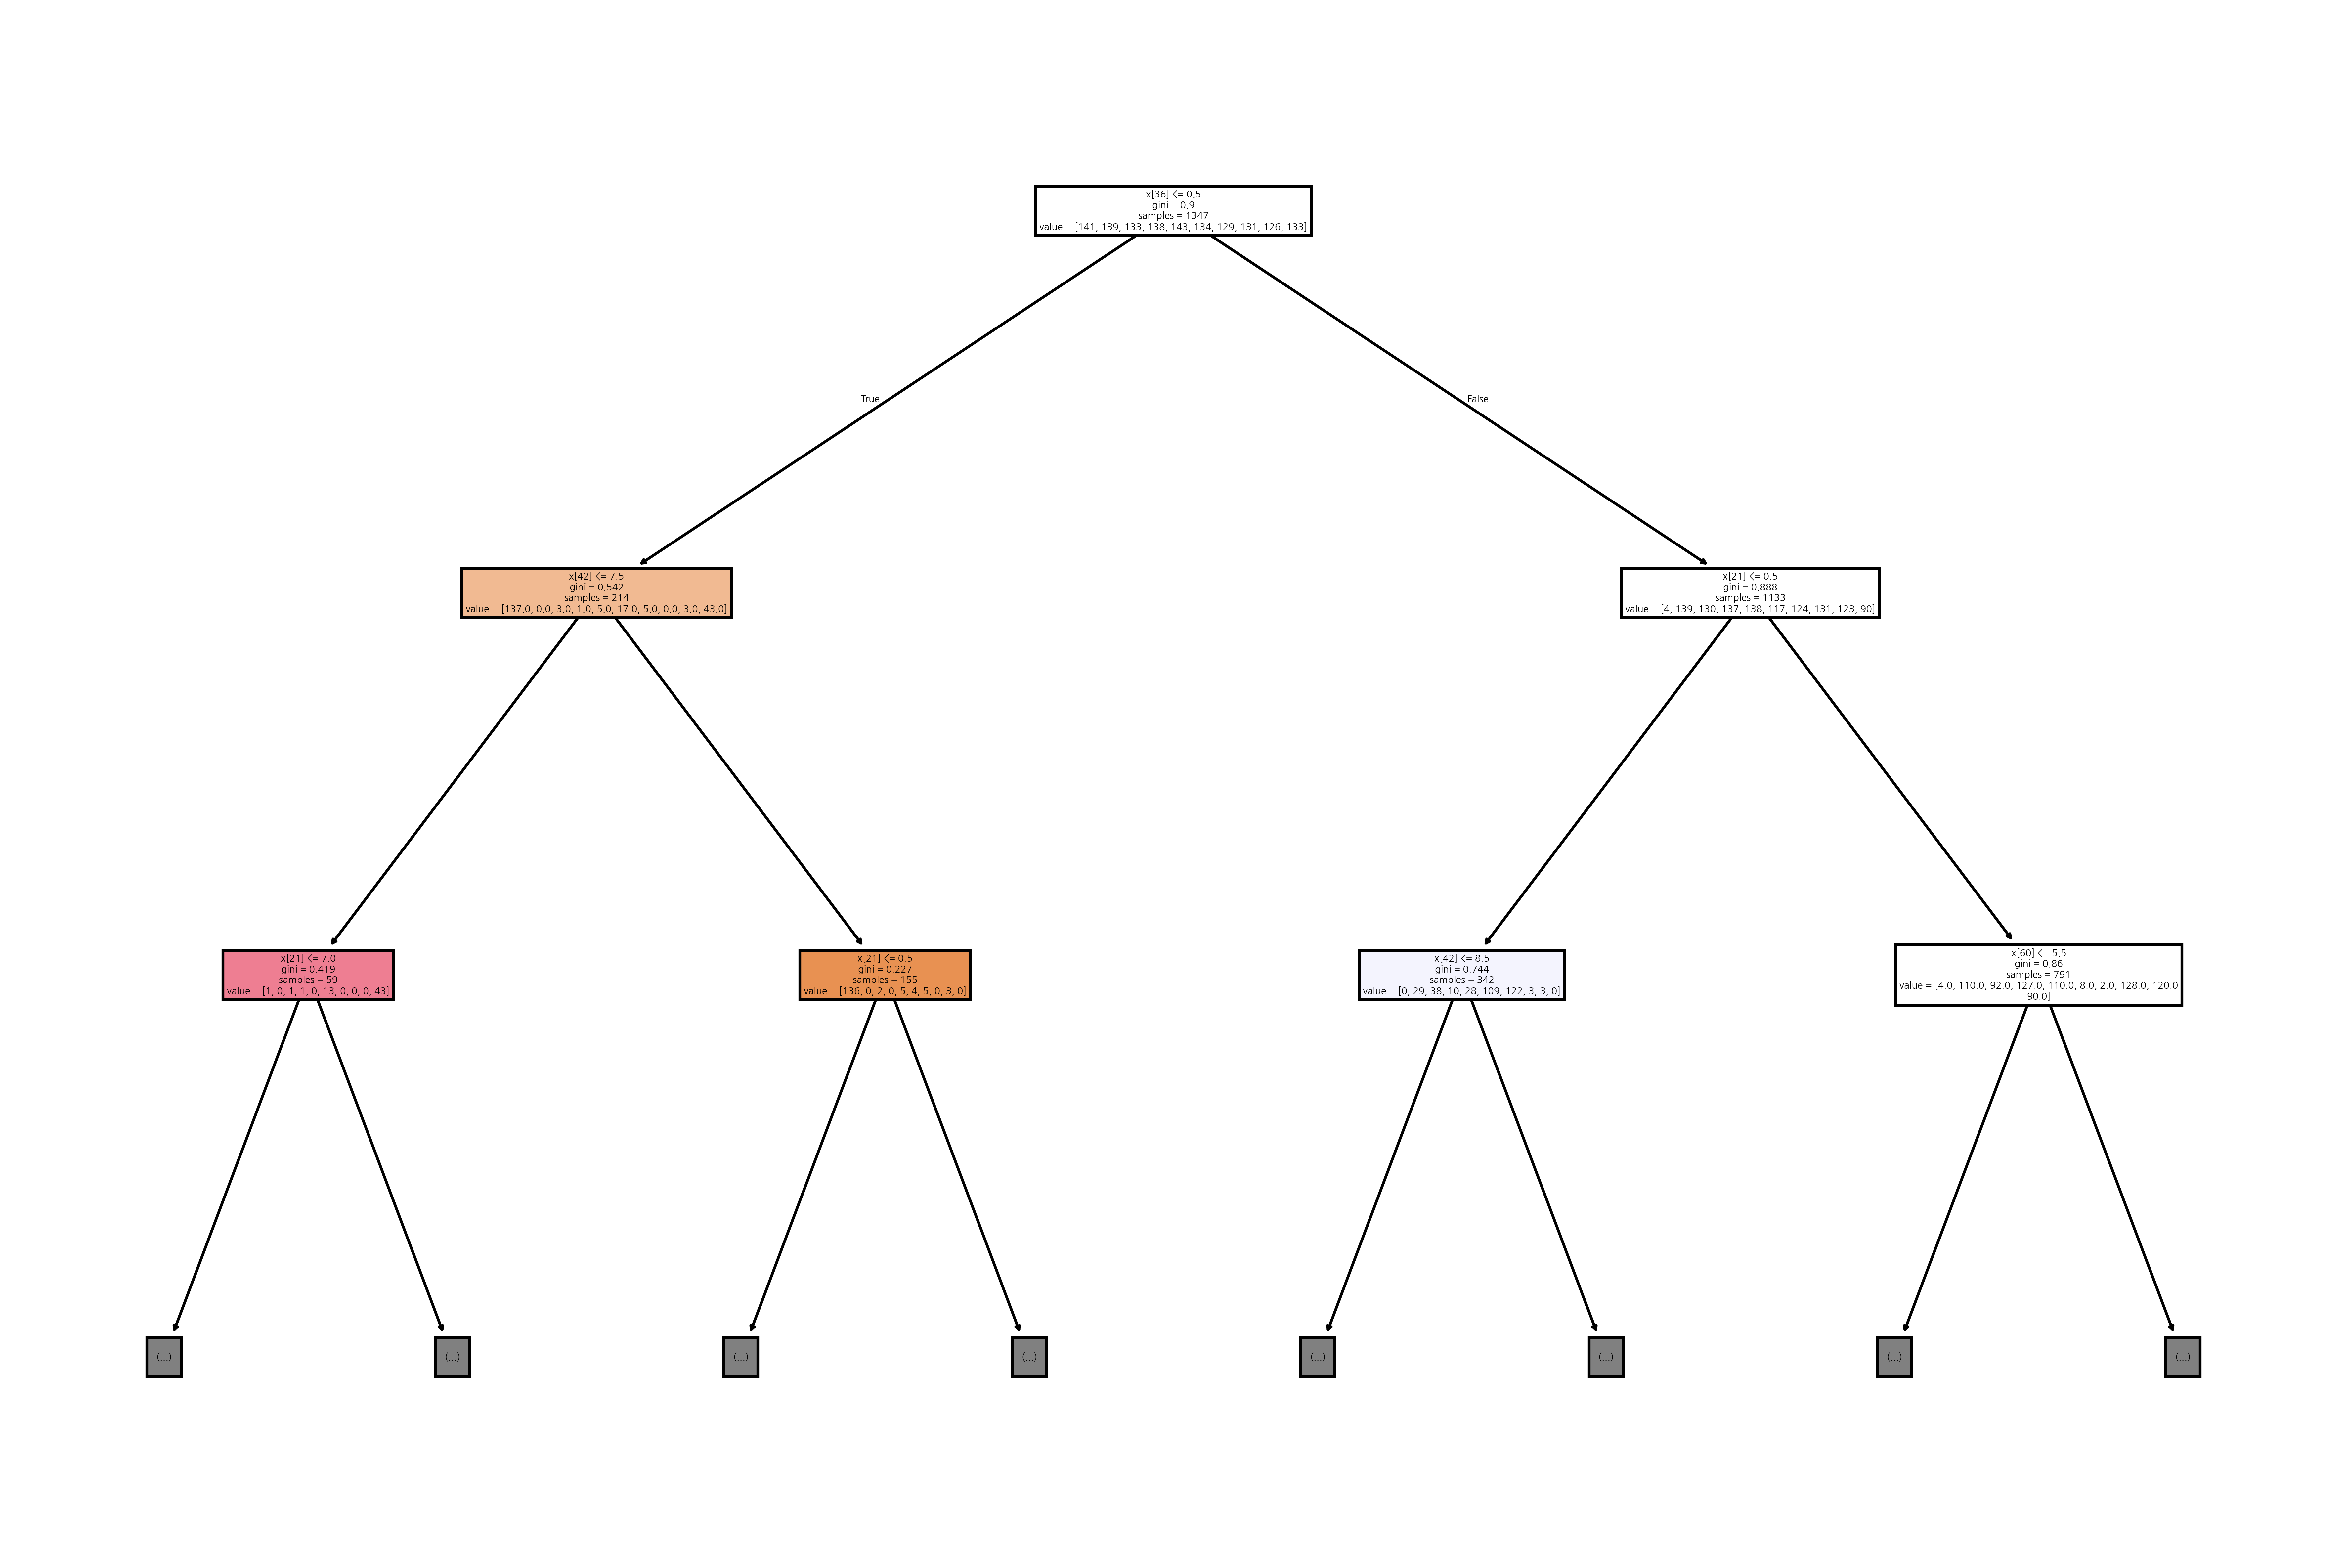

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10), dpi=600)

plt.show()

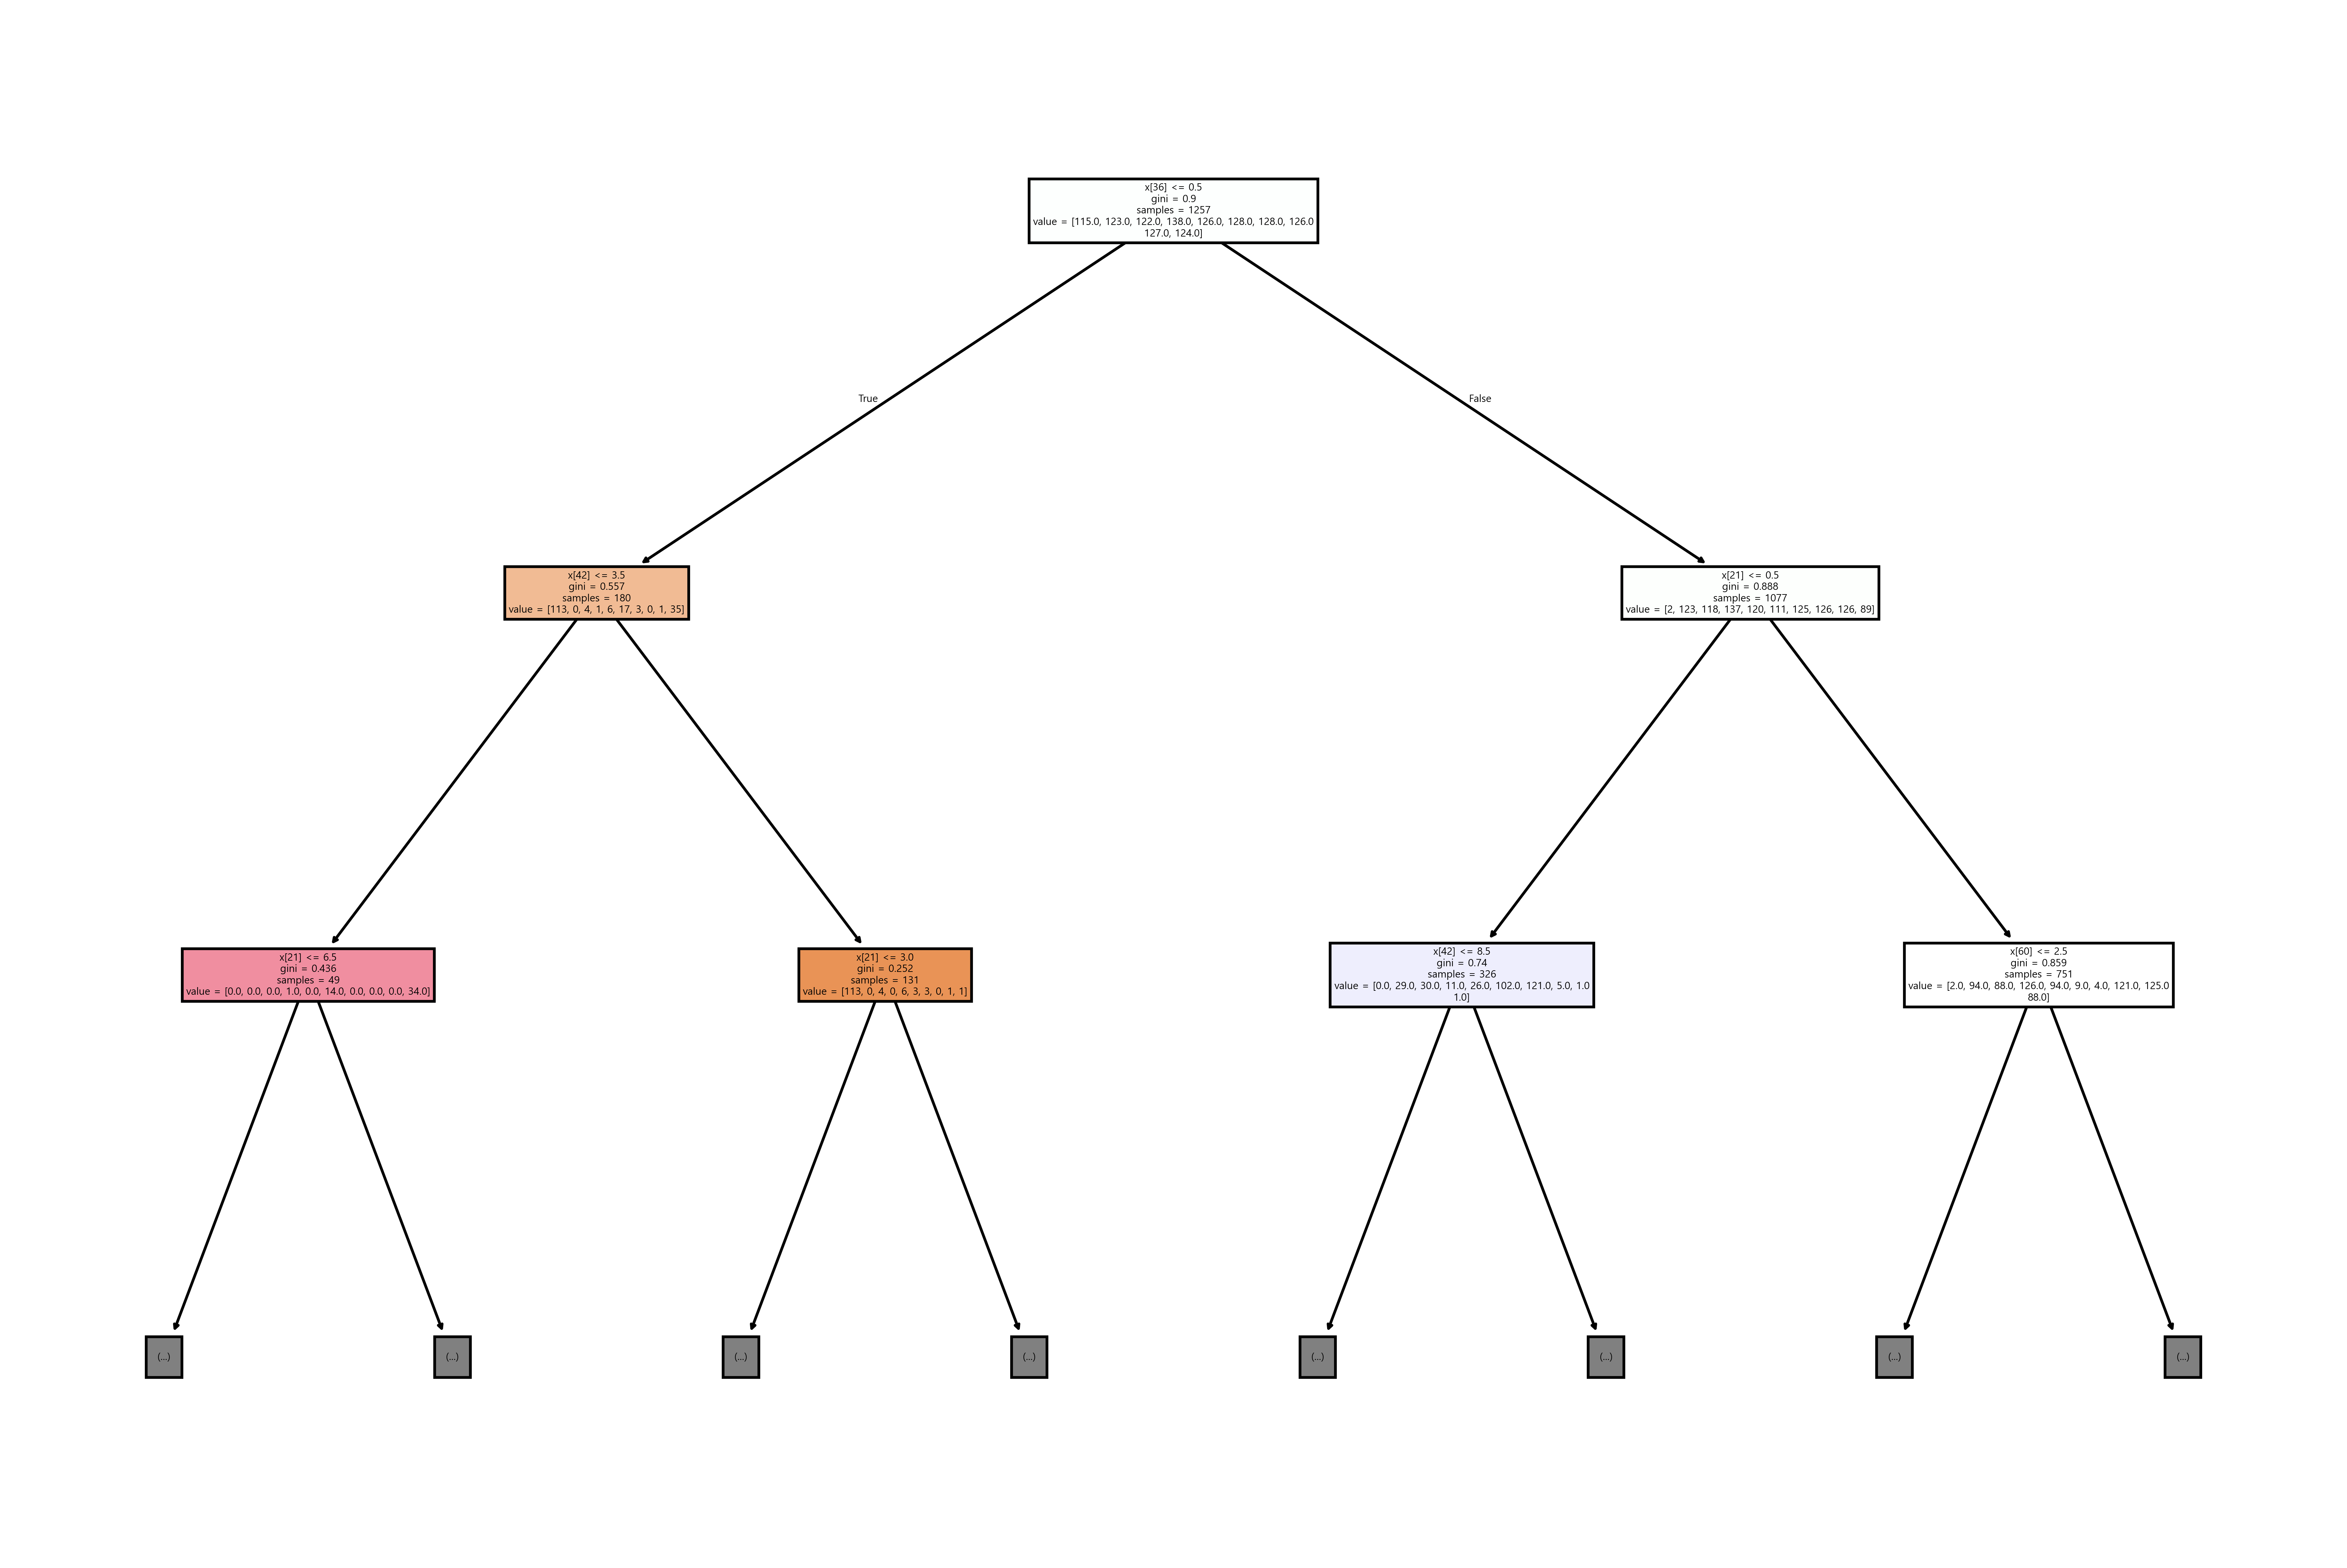

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10), dpi=600)
plot_tree(dt_clf,max_depth=2,filled=True)
plt.show()

### 3). 예측 수행

predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측 값을 반환한다.

In [33]:
pred_test1=dt_clf.predict(X_test)

### 4). 평가



1.0
0.86


In [34]:
print('학습데이터 :',dt_clf.score(X_train,y_train))
print('테스트데이터 :',dt_clf.score(X_test,y_test))

print(classification_report(y_test,pred_test1))

학습데이터 : 1.0
테스트데이터 : 0.8537037037037037
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        63
           1       0.89      0.81      0.85        59
           2       0.83      0.95      0.88        55
           3       0.84      0.71      0.77        45
           4       0.87      0.87      0.87        55
           5       0.83      0.89      0.86        54
           6       0.94      0.89      0.91        53
           7       0.84      0.89      0.86        53
           8       0.69      0.77      0.73        47
           9       0.80      0.77      0.78        56

    accuracy                           0.85       540
   macro avg       0.85      0.85      0.85       540
weighted avg       0.86      0.85      0.85       540



In [ ]:
from sklearn.metrics import accuracy_score



예측 정확도: 0.8600


### 5) 샘플 데이터 예측

In [66]:
X_test.shape

(450, 64)

In [67]:
digits['data'][100].shape

(64,)

In [35]:
digits['data'][100].reshape(1,-1).shape

(1, 64)

(1, 64)

In [36]:
digits['target'][100]

np.int64(4)

In [ ]:
# 이미지 하나 예측



array([4])

In [ ]:
img=digits['data'][100].reshape(1,-1)
pred=dt_clf.predict(img)

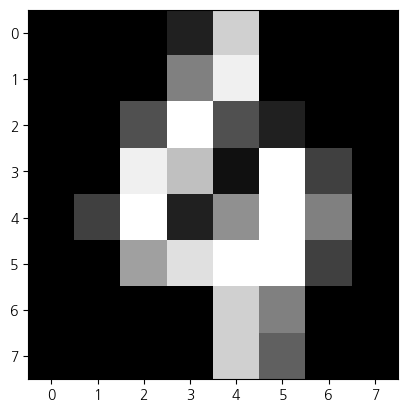

In [ ]:
# 예측한 이미지



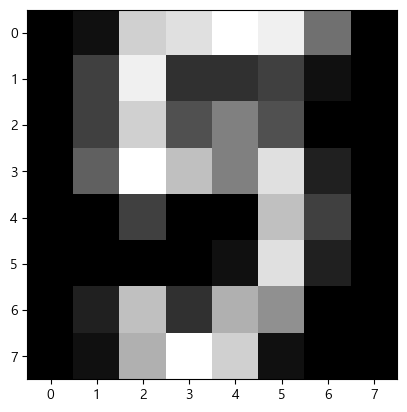

In [38]:
plt.imshow(digits['data'][541].reshape(8,8), cmap=plt.cm.gray)

### "실습" 오분류된 샘플 시각화


# "실습" KNN 으로 분류

KNN 으로 숫자 이미지 분류를 수행해 보자

---

## 참고

 - [machine learning with scikit-learn: digits](https://www.codementor.io/@mgalarny/making-your-first-machine-learning-classifier-in-scikit-learn-python-db7d7iqdh)